# HW 03. Exploratory Data Analysis

아래에 T1~T5에서 To Do 로 표시된 곳에 코드를 완성하세요. 

## Titanic dataset

Seaborn에 포함된 토이 데이터셋 중 타이타닉 데이터셋을 사용한다. 아래 코드를 통해서 데이터셋을 로딩한다. 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


titanic = sns.load_dataset('titanic')

아래 코드를 실행해보면 로드된 데이터의 타입이 Pandas DataFrame인 것을 확인할 수 있다.

In [ ]:
type(titanic)

pandas.core.frame.DataFrame

데이터셋의 크기를 확인해보자.

In [ ]:
titanic.shape

(891, 15)

891개의 행과 15개의 열로 이뤄진것을 확인하였다. 타이타닉 데이터셋이 어떤 내용을 포함했는지 처음 열개의 행을 출력해보자.

In [ ]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


위에 출력된 테이블을 통해서 각 열의 데이터 타입을 유추해보고, 아래 코드를 실행해서 확인해보자. int64, float64로 표기된 열은 수치형 자료이고, object, category, bool은 범주형 자료임을 알 수 있다. 일부 열은 범주형 자료가 수치형으로 저장된 것을 확인할 수 있다.

[참조: titatnic dataset description](https://data.world/nrippner/titanic-disaster-dataset)

[참조: pandas dtype](https://pbpython.com/pandas_dtypes.html)

In [ ]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

수치형 자료의 경우 아래 코드를 통해서 기초통계량을 확인해 볼 수 있다.

In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


데이터셋의 전체 행 갯수가 891인데 일부 변수들은 count가 891보다 작은 것으로 보아 일부 값이 누락되었음을 확인할 수 있다. head()로 출력한 테이블에서 NaN으로 표기된 값들이 누락된 값들이다. 테이블에 계산된 평균, 표준편차 등은 누락된 값을 제외하고 계산한 값이다. info() 메소드를 사용하면 모든 변수들에 대한 dtype과 count를 확인할 수 있다.

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


확인해보니 deck에는 누락된 값이 너무 많다. 제거하자.

In [ ]:
titanic.drop('deck', inplace=True, axis=1)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


## T1. 도수분포표 만들기
타이타닉에 승선한 남녀 비율이 궁금하다. 우선 [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) 메소드를 사용해 남녀 도수분포표를 만들어 보자. 


In [ ]:
## To Do
pd.crosstab(titanic['sex'], titanic['survived'], margins = True)


survived,0,1,All
sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


간단히 빈도를 확인할때는 crosstab보다 value_counts 메소드가 더 적합하다.

In [ ]:
titanic["sex"].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [ ]:
titanic["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [ ]:
titanic["class"].value_counts().sort_index()

First     216
Second    184
Third     491
Name: class, dtype: int64

In [ ]:
titanic["embark_town"].value_counts().sort_index()

Cherbourg      168
Queenstown      77
Southampton    644
Name: embark_town, dtype: int64

대략 남자가 더 많이 탔고, 과반수 이상이 사망했으며, 2등객실 승객이 가장 적었고, Southampton에서 대다수의 승객이 탑승한 것을 확인할 수 있다.

## T2. 파이차트
한눈에 남녀 비율을 파악하고 싶다. 
아래 그림 처럼 파이차트를 출력하는 코드를 작성해 보자.


![picture](https://drive.google.com/uc?id=1-SnmdWshpBsnZAlBkVNp02PZQj2mUuDd)

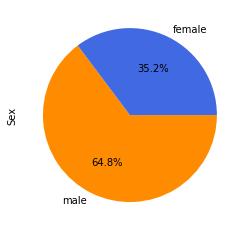

In [ ]:
## To Do
colors = ['darkorange', 'royalblue']
titanic["sex"].value_counts().plot.pie(autopct='%0.01f%%', ylabel = "Sex", counterclock = False, colors = colors)
plt.show()


영화 타이타닉에서 아이들과 여성들을 먼저 구명보트에 태우는 장면이 있었다. 정말 그랬었는지 확인해보자. 우선 아이와 어른으로 그룹을 나눠서 확인해보자.

두개의 시리즈를 이용해서 DataFrame을 만들 수 있다. 생성된 DataFrame을 df라고 할때, df.T 를 통해서 Transpose된 데이터셋에 접근할 수 있다. df.index를 인덱스 이름을 df.columns를 이용해서 열 이름을 변경할 수 있다. 

In [ ]:
child = titanic[titanic['who']=='child']['survived'].value_counts()
adult = titanic[titanic['who']!='child']['survived'].value_counts()
df = pd.DataFrame([child, adult], index = ['survived', 'died'])
df.index = ['child', 'adult']
df.columns = ['died', 'survived']
print(df)

       died  survived
child    34        49
adult   515       293


아래와 같은 파이차트를 그려보자. 

![picture](https://drive.google.com/uc?id=1-XTGHMrTMEuCBU_kyFxQT0LB0IiPmIPv)

[참조: pandas visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [ ]:
series = pd.Series(child[0], index = ["survived", "died"])
print(series)

survived    34
died        34
dtype: int64


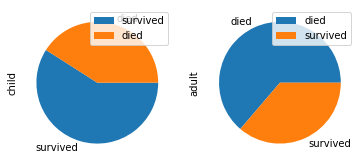

In [ ]:
## To Do
f, ax = plt.subplots(1, 2, figsize=(6, 6))

labels = 'survived', 'died'
labels2 = 'died', 'survived'
child.plot.pie(ax=ax[0], labels = labels, counterclock = False, legend = True)
ax[0].set_ylabel('child')
adult.plot.pie(ax=ax[1], labels = labels2, legend = True)
ax[1].set_ylabel('adult')

plt.show()

파이차트로 그려보니 아이들의 생존율이 어른보다 약간 더 높아 보인다.

동일하게 성별 별로 그려보면 아래와 같은 파이차트를 얻을 수 있다.

![picture](https://drive.google.com/uc?id=1-XwC8SVyMsdJXGQVZUFRk67UhwMYiRSY)

위 차트를 보면 남녀별로 생존율에 큰 차이를 볼 수 있다.



## T3. 막대그래프

위 파이차트로 생존/사망자의 남녀별 비율을 확인해보았다.
이번엔 각 성별 별 전체 탑승인원에 생존자 수를 보여주는 누적 막대 그래프를 아래와 같이 그려보자.

![picture](https://drive.google.com/uc?id=1-UEmDC3lpBkkMhkXiNeK0S60Vn8FIWOW)


In [ ]:
male = titanic[titanic['sex']=='male']['survived'].value_counts()
female = titanic[titanic['sex']=='female']['survived'].value_counts()

In [ ]:
male

0    468
1    109
Name: survived, dtype: int64

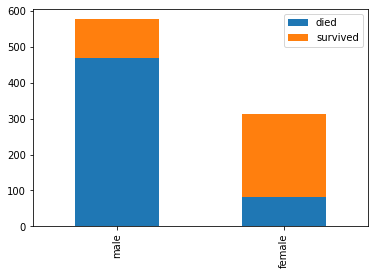

In [ ]:
## To Do 
df = pd.DataFrame([male, female], index = ["male", "female"])
df.plot.bar(stacked = True)
plt.legend(['died', 'survived'])

위 누적 막대그래프로


*   승객 중 남자가 많았음.
*   여성 승객이 더 많이 생존했음. 
*   남성 승객은 생존자보다 사망자가 많았음.

등을 확인할 수 있다.



## T4. Box plots

위에 head로 살펴본 데이터에서 이상한 점이 발견되었다. 같은 등급객실임에도 지불한 가격이 다르다. 
객실별 가격을 아래처럼 Box plot으로 그려보자.

![picture](https://drive.google.com/uc?id=1-Zj4MjHnoKeQ6wXzXn2KEWL_eXbPvDny)

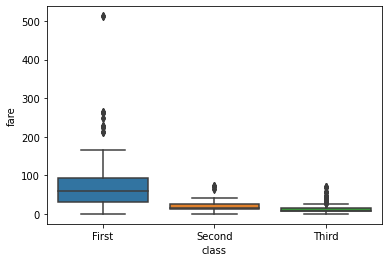

In [ ]:
## To Do
sns.boxplot(x = titanic['class'], y = titanic['fare'])

## T5. Scatter plot

혹시 나이와 요금간에 상관관계가 있나 객실별로 아래와 같이 scatter plot을 그려보자.

![picture](https://drive.google.com/uc?id=1-_pfgqoVwshU6GpdTdGz8Nm_34uUus6K)



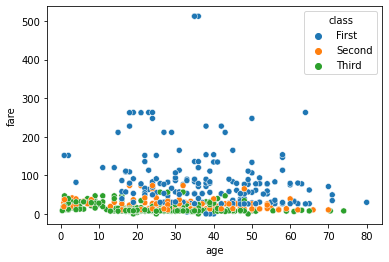

In [ ]:
## To Do
sns.scatterplot(x = titanic['age'], y = titanic['fare'], hue = titanic['class'])

나이와 요금사이에 특별한 상관관계는 보이지 않는다.
